In [1]:
'''
문) load_boston() 함수를 이용하여 보스턴 시 주택 가격 예측 회귀모델 생성 
  조건1> train/test - 7:3비울
  조건2> y 변수 : boston.target
  조건3> x 변수 : boston.data
  조건4> 모델 평가 : MSE, r2_score
'''

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. data load
boston = load_boston()
print(boston) # "data", "target"


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# 2. 변수 
x = boston.data
y = boston.target
#print(x)
#print(y)
print(x.shape)
print(y.shape)
'''
(506, 13) -> x변수(주택가격 영향 미치는 요인) 
(506,) -> y변수(주택가격) 
'''

(506, 13)
(506,)


In [5]:
# 3. train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [6]:
# 4. 회귀모델 생성 : train set
boston_model = LinearRegression().fit(x_train, y_train)
print('회귀계수')
print("기울기 :", boston_model.coef_)
print('절편 :', boston_model.intercept_)



회귀계수
기울기 : [-1.02028730e-01  5.19922484e-02  1.11224278e-02  1.53623101e+00
 -2.02986380e+01  3.73895172e+00  2.73758140e-02 -1.42623467e+00
  3.27840083e-01 -1.23511220e-02 -1.05341903e+00  9.32607604e-03
 -5.56731901e-01]
절편 : 38.4110637067487


In [8]:
# 5. 모델 평가 : test set
pred = boston_model.predict(x_test)
Y = y_test
mse = mean_squared_error(Y, pred)
print('MSE =', mse)

MSE = 21.934832743390476


In [9]:
# 2) 결정계수 : target 변수 표준화 안된 경우 : 
print('결정계수 : %.2f' % r2_score(Y, pred))

결정계수 : 0.70


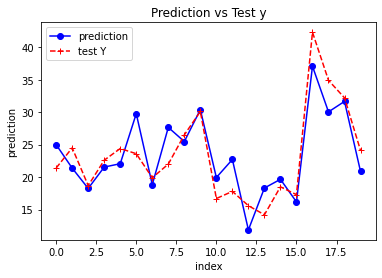

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
chart = fig.add_subplot(1,1,1)
chart.plot(pred[:20], marker=r'o', color=u'blue', linestyle='-', label='prediction')
chart.plot(Y[:20], marker=r'+', color=u'red', linestyle='--', label='test Y')

chart.set_title('Prediction vs Test y')
plt.xlabel('index')
plt.ylabel('prediction')
plt.legend(loc='best')
plt.show()
